### Big Sales Mart

1. Univariate Analysis - Single Variable

For Numerical Column - We create Histogram (Distplot | Seaborn)
For Cat Columns - BARPLOT | Countplot

2. Bivariate Analysis:: Predictor vs Target Variable

Num - Num | Scatterplot
Cat vs Numerical - Boxplot | Violinplot
Cat vs Categorical - pd.crosstab | Table | Barplot

3. Missing Values:: Mean,Median Imputation | Model Based Imputation

pattern based imputation



In [3]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_table("./Downloads/Train_UWu5bXk.txt", sep = ",")
# sep is called delimiter in SAS...(DLM)

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [5]:
test = pd.read_table("./Downloads/Test_u94Q5KV.txt", sep = ",")

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [6]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Univariate Analysis

1. Find out Numerical Columns

2. Categorical Columns

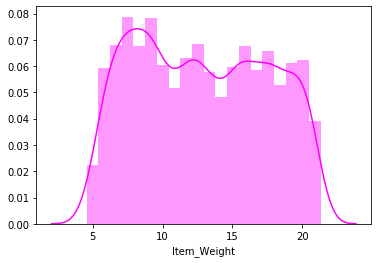

In [7]:
sns.distplot(train[pd.notnull(train.Item_Weight)]["Item_Weight"], 
             color = "magenta")

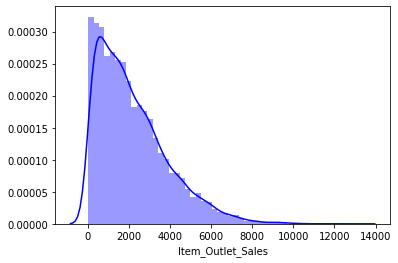

In [8]:
# Target Variable - Sales
sns.distplot(train.Item_Outlet_Sales, color="blue")

Anamoly Found - Sales starts from 0. Either Disc/Offers else it is a problem..

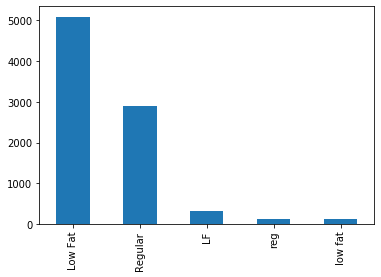

In [9]:
# Item_Fat_Content
train.Item_Fat_Content.value_counts().plot(kind="bar")

In [10]:
# Rectify this
train.Item_Fat_Content.replace(["LF", "low fat", "reg"], 
                               ["Low Fat","Low Fat", "Regular"], inplace=True)

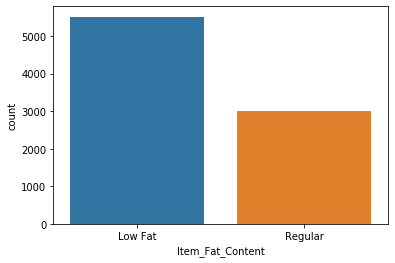

In [11]:
sns.countplot(train.Item_Fat_Content)

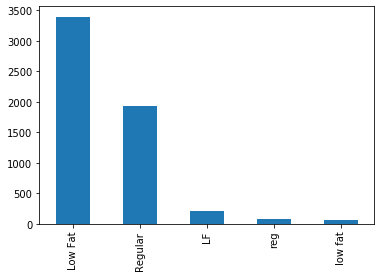

In [12]:
test.Item_Fat_Content.value_counts().plot(kind="bar")

In [13]:
# Rectify this - Test Dataset
test.Item_Fat_Content.replace(["LF", "low fat", "reg"], 
                               ["Low Fat","Low Fat", "Regular"], inplace=True)

In [14]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

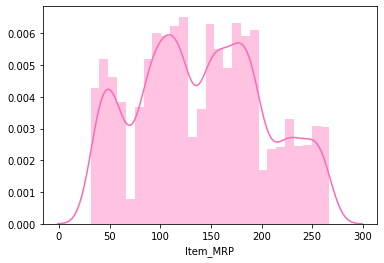

In [15]:
# Item MRP
sns.distplot(train.Item_MRP, color="hotpink")

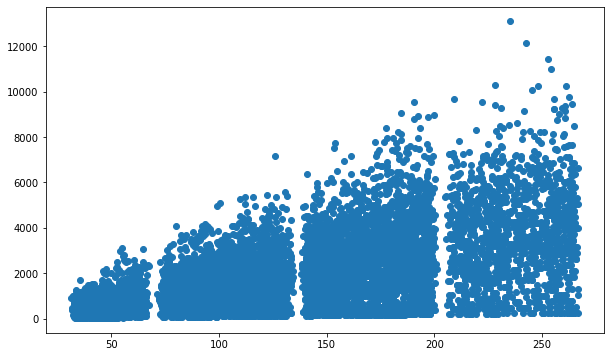

In [16]:
plt.figure(figsize=[10,6])
plt.scatter(train.Item_MRP, train.Item_Outlet_Sales)

In [17]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Feature Engineering
1. Price per Unit - MRP / Weight

### Bivariate Analysis

1. Item Weight vs Sales

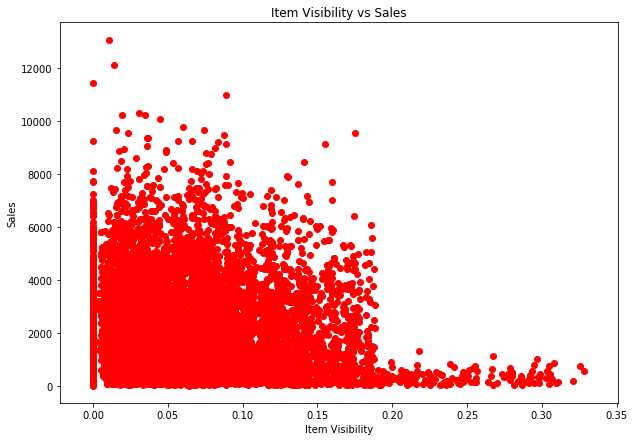

In [18]:
plt.figure(figsize=[10,7])
plt.scatter(train.Item_Visibility, train.Item_Outlet_Sales, color="red")
plt.xlabel("Item Visibility")
plt.ylabel("Sales")
plt.title("Item Visibility vs Sales")
plt.show()

1. Lots of 0s are appearing in visibility...
2. Higher visible items have less sales

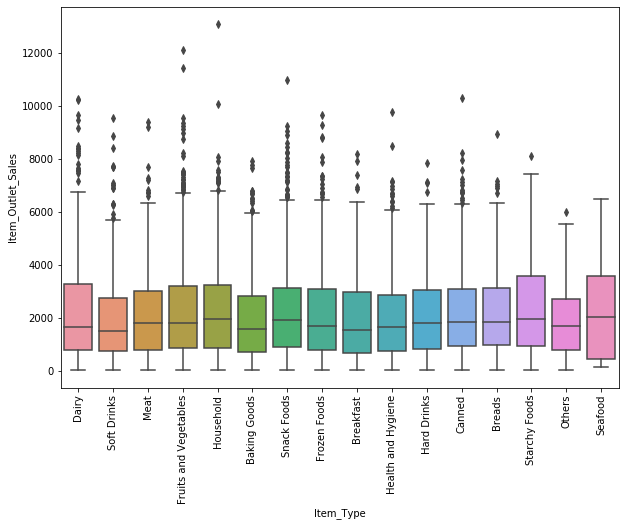

In [19]:
# Item Type Vs Sales
plt.figure(figsize = [10,7])
sns.boxplot(x = "Item_Type", y = "Item_Outlet_Sales", data = train)
plt.xticks(rotation = 90)
plt.show()

Top 5 Performing Items - Dairy, F & Veggies, Household and Snack Foods

In [20]:
# Statistical Summary of Item Type V Sales
train.groupby("Item_Type")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,648.0,1952.971207,1546.788045,37.2848,705.08220,1577.9460,2823.82425,7931.6754
Breads,251.0,2204.132226,1644.235914,35.2874,968.73900,1860.2452,3145.90500,8958.3390
Breakfast,110.0,2111.808651,1911.693586,39.9480,679.11600,1554.6430,2970.30025,8209.3140
Canned,649.0,2225.194904,1645.235638,37.9506,952.09400,1860.2452,3101.29640,10306.5840
Dairy,682.0,2232.542597,1884.404698,40.6138,788.97300,1650.8511,3296.20935,10256.6490
Frozen Foods,856.0,2132.867744,1724.777720,36.6190,808.94700,1687.1372,3079.49145,9678.0688
Fruits and Vegetables,1232.0,2289.009592,1799.503459,45.2744,884.84820,1830.9500,3227.13260,12117.5600
Hard Drinks,214.0,2139.221622,1606.191587,37.9506,834.91320,1816.6353,3071.33540,7843.1240
Health and Hygiene,520.0,2010.000265,1553.633063,34.6216,758.84555,1669.4935,2884.57850,9779.9362


In [21]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

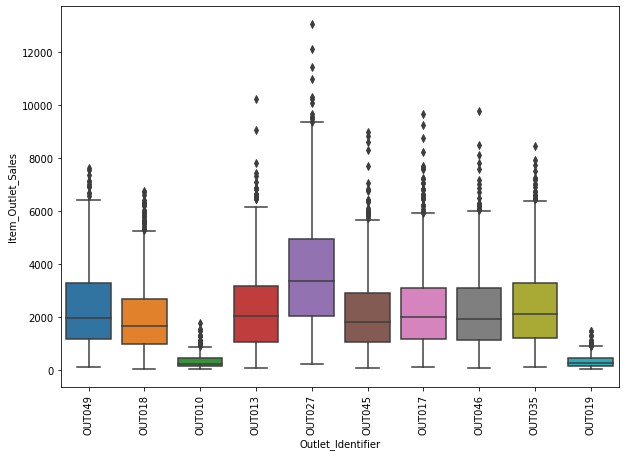

In [22]:
# Item Type Vs Sales
plt.figure(figsize = [10,7])
sns.boxplot(x = "Outlet_Identifier", y = "Item_Outlet_Sales", data = train)
plt.xticks(rotation = 90)
plt.show()

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [24]:
# Finding the pattern in Outlets
train[train.Item_Outlet_Sales>8000]["Outlet_Identifier"].value_counts()

OUT027    36
OUT045     4
OUT017     4
OUT046     3
OUT013     2
OUT035     1
Name: Outlet_Identifier, dtype: int64

In [25]:
# Products in Outlet 27
train[train.Outlet_Identifier=="OUT027"]["Item_Type"].value_counts()

Fruits and Vegetables    140
Snack Foods              137
Household                 99
Frozen Foods              89
Canned                    72
Baking Goods              69
Dairy                     67
Health and Hygiene        60
Meat                      56
Soft Drinks               45
Breads                    31
Hard Drinks               23
Others                    15
Starchy Foods             14
Breakfast                 11
Seafood                    7
Name: Item_Type, dtype: int64

In [26]:
train[train.Outlet_Identifier=="OUT027"]["Outlet_Location_Type"].value_counts()

Tier 3    935
Name: Outlet_Location_Type, dtype: int64

In [27]:
train["Outlet_Vintage"] = 2013 - train.Outlet_Establishment_Year

In [28]:
test["Outlet_Vintage"] = 2013 - test.Outlet_Establishment_Year

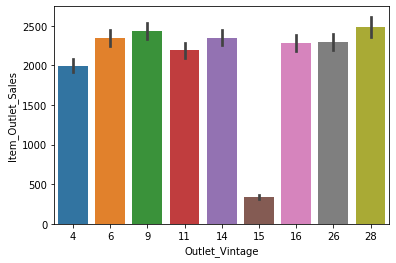

In [29]:
sns.barplot(x = "Outlet_Vintage", y = "Item_Outlet_Sales", data = train)

No Pattern Identified in Outlet Vintage

### Missing Values

In [30]:
# Item Weight - basis item type
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [31]:
train[train.Item_Identifier=="NCD19"]["Item_Weight"]

4       8.93
522     8.93
802     8.93
2129    8.93
2907    8.93
3428    8.93
Name: Item_Weight, dtype: float64

In [32]:
# Through Loop
weights = pd.Series()
for i in train.Item_Identifier:
    weights[i] = train[train.Item_Identifier==i]["Item_Weight"].mean()

In [33]:
# Lambda
train["Item_Weight"]=train.groupby("Item_Identifier")["Item_Weight"].transform(lambda x:x.fillna(x.mean()))

In [34]:
train[train.Item_Weight.isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,28
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280,28
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046,28
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098,28


In [35]:
# FDN52 - Jugaad
train.iloc[4187,1]=13.379
train.iloc[927,1]=12.78
train.iloc[1922,1]=13.031
train.iloc[5022,1]=12.28

In [36]:
train[train.Item_Type=="Baking Goods"]["Item_Weight"].describe()

count    648.000000
mean      12.285309
std        4.746117
min        4.880000
25%        8.235000
50%       11.650000
75%       15.700000
max       20.850000
Name: Item_Weight, dtype: float64

In [37]:
# Item ID Type
train["Item_IDType"] = train.Item_Identifier.str[:2]

In [38]:
test["Item_IDType"] = test.Item_Identifier.str[:2]

In [39]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Vintage,Item_IDType
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,14,FD
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,6,FD
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,15,NC
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,6,FD
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,28,FD


In [40]:
# Perishables
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Vintage', 'Item_IDType'],
      dtype='object')

In [41]:
perishables = ['Dairy','Meat', 'Fruits and Vegetables',
       'Breakfast', 'Breads', 'Starchy Foods','Seafood']

In [42]:
def perish(x):
    if (x in perishables):
        return("Perishables")
    else:
        return("Non Perishables")

In [43]:
train["Item_TypeCat"] = train.Item_Type.apply(perish)

In [44]:
test["Item_TypeCat"] = test.Item_Type.apply(perish)

In [45]:
# Price per Unit
train["Price_Per_Unit"] = train.Item_MRP/train.Item_Weight

In [46]:
test["Price_Per_Unit"] = test.Item_MRP/test.Item_Weight

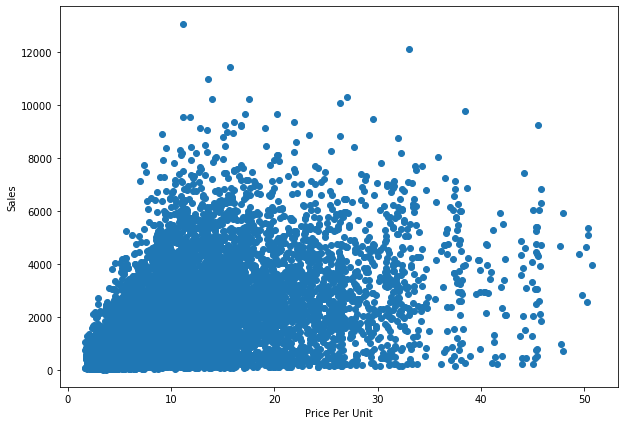

In [47]:
plt.figure(figsize=[10,7])
plt.scatter(train.Price_Per_Unit, train.Item_Outlet_Sales)
plt.xlabel("Price Per Unit")
plt.ylabel("Sales")
plt.show()

In [48]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage,Item_IDType,Item_TypeCat,Price_Per_Unit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,FD,Perishables,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,DR,Non Perishables,8.153581
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,FD,Perishables,8.092457
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,15,FD,Perishables,9.484115
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,NC,Non Perishables,6.031512


In [49]:
train["Vintage"] = 2013-train.Outlet_Establishment_Year

In [50]:
pd.DataFrame(train.groupby("Outlet_Size")["Outlet_Type"].value_counts()).T

Outlet_Size              High            Medium                    \
Outlet_Type Supermarket Type1 Supermarket Type3 Supermarket Type1   
Outlet_Type               932               935               930   

Outlet_Size                               Small                
Outlet_Type Supermarket Type2 Supermarket Type1 Grocery Store  
Outlet_Type               928              1860           528

In [51]:
train[train.Outlet_Size.isna()]["Outlet_Type"].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [52]:
train.Outlet_Size.fillna("Small", inplace =True)

### Test Set

In [53]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Outlet_Vintage                  0
Item_IDType                     0
Item_TypeCat                    0
Price_Per_Unit                976
dtype: int64

In [54]:
# Lambda
test["Item_Weight"]=test.groupby("Item_Identifier")["Item_Weight"].transform(lambda x:x.fillna(x.mean()))

In [55]:
testmiss = test[test.Item_Weight.isna()]

In [56]:
testmiss.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Vintage,Item_IDType,Item_TypeCat,Price_Per_Unit
58,FDL58,NaN,Regular,0.129825,Snack Foods,263.2568,OUT019,1985,Small,Tier 1,Grocery Store,28,FD,Non Perishables,NaN
482,FDY57,NaN,Regular,0.120667,Snack Foods,94.6752,OUT027,1985,Medium,Tier 3,Supermarket Type3,28,FD,Non Perishables,NaN
882,FDH58,NaN,Low Fat,0.036761,Snack Foods,116.9834,OUT027,1985,Medium,Tier 3,Supermarket Type3,28,FD,Non Perishables,NaN
884,FDI45,NaN,Low Fat,0.037399,Fruits and Vegetables,173.1054,OUT027,1985,Medium,Tier 3,Supermarket Type3,28,FD,Perishables,NaN
1203,FDG50,NaN,Low Fat,0.015198,Canned,89.7146,OUT027,1985,Medium,Tier 3,Supermarket Type3,28,FD,Non Perishables,NaN


In [57]:
test[test.Item_Identifier=="FDL58"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Vintage,Item_IDType,Item_TypeCat,Price_Per_Unit
58,FDL58,NaN,Regular,0.129825,Snack Foods,263.2568,OUT019,1985,Small,Tier 1,Grocery Store,28,FD,Non Perishables,NaN
3619,FDL58,NaN,Regular,0.073790,Snack Foods,265.0568,OUT027,1985,Medium,Tier 3,Supermarket Type3,28,FD,Non Perishables,NaN


In [58]:
# Calculate the Missing value for Test Item Weight
rownos = testmiss.index
foodtypes = testmiss.Item_Type
for i in rownos:
    test.loc[i,"Item_Weight"]=test[test.Item_Type==foodtypes[i]]["Item_Weight"].median()

In [59]:
test["Price_Per_Unit"] = test.Item_MRP/test.Item_Weight

In [60]:
visiblezero = train[train.Item_Visibility==0]

In [61]:
visiblezero

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage,Item_IDType,Item_TypeCat,Price_Per_Unit,Vintage
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,FD,Perishables,9.484115,15
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,NC,Non Perishables,6.031512,26
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,4,FD,Non Perishables,4.944762,4
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,14,FD,Perishables,3.859339,14
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064,4,FD,Non Perishables,13.725519,4
33,FDO23,17.850,Low Fat,0.0,Breads,93.1436,OUT045,2002,Small,Tier 2,Supermarket Type1,2174.5028,11,FD,Perishables,5.218129,11
46,NCP05,19.600,Low Fat,0.0,Health and Hygiene,153.3024,OUT045,2002,Small,Tier 2,Supermarket Type1,2428.8384,11,NC,Non Perishables,7.821551,11
60,FDM20,10.000,Low Fat,0.0,Fruits and Vegetables,246.9144,OUT018,2009,Medium,Tier 3,Supermarket Type2,3185.1872,4,FD,Perishables,24.691440,4
72,FDH35,18.250,Low Fat,0.0,Starchy Foods,164.7526,OUT045,2002,Small,Tier 2,Supermarket Type1,4604.6728,11,FD,Perishables,9.027540,11
79,FDV25,5.905,Low Fat,0.0,Canned,222.5456,OUT045,2002,Small,Tier 2,Supermarket Type1,5305.0944,11,FD,Non Perishables,37.687655,11


In [62]:
train[train.Item_Identifier=="FDP33"]["Item_Visibility"].median()

0.08923510800000001

In [63]:
itemid = visiblezero.Item_Identifier # This is itemid for Zero Visibility

In [64]:
rownos = visiblezero.index # Row nos of Item Visibility 0 Rows

In [65]:
for i in rownos:
    train.loc[i,"Item_Visibility"] = train[train.Item_Identifier==itemid[i]]["Item_Visibility"].median()

In [66]:
visiblezero

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage,Item_IDType,Item_TypeCat,Price_Per_Unit,Vintage
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,FD,Perishables,9.484115,15
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,NC,Non Perishables,6.031512,26
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,4,FD,Non Perishables,4.944762,4
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,14,FD,Perishables,3.859339,14
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064,4,FD,Non Perishables,13.725519,4
33,FDO23,17.850,Low Fat,0.0,Breads,93.1436,OUT045,2002,Small,Tier 2,Supermarket Type1,2174.5028,11,FD,Perishables,5.218129,11
46,NCP05,19.600,Low Fat,0.0,Health and Hygiene,153.3024,OUT045,2002,Small,Tier 2,Supermarket Type1,2428.8384,11,NC,Non Perishables,7.821551,11
60,FDM20,10.000,Low Fat,0.0,Fruits and Vegetables,246.9144,OUT018,2009,Medium,Tier 3,Supermarket Type2,3185.1872,4,FD,Perishables,24.691440,4
72,FDH35,18.250,Low Fat,0.0,Starchy Foods,164.7526,OUT045,2002,Small,Tier 2,Supermarket Type1,4604.6728,11,FD,Perishables,9.027540,11
79,FDV25,5.905,Low Fat,0.0,Canned,222.5456,OUT045,2002,Small,Tier 2,Supermarket Type1,5305.0944,11,FD,Non Perishables,37.687655,11


In [67]:
train[(train.Item_Identifier=="FDY07") & (train.Item_Type=="Fruits and Vegetables")]["Item_Visibility"].mean()

0.052234102857142854

In [68]:
train.loc[10, "Item_Visibility"]=0.0522
train.loc[651, "Item_Visibility"]=0.0522
train.loc[4791, "Item_Visibility"]=0.0522
train.loc[4208, "Item_Visibility"]=0.0522

In [69]:
# find df where the visible = 0
testvisiblezero = test[test.Item_Visibility==0]

In [70]:
testvisiblezero.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Vintage,Item_IDType,Item_TypeCat,Price_Per_Unit
56,FDA09,13.350,Regular,0.0,Snack Foods,179.6660,OUT013,1987,High,Tier 3,Supermarket Type1,26,FD,Non Perishables,13.458127
90,FDN39,19.350,Regular,0.0,Meat,165.7816,OUT045,2002,NaN,Tier 2,Supermarket Type1,11,FD,Perishables,8.567525
109,FDU14,17.750,Low Fat,0.0,Dairy,249.7750,OUT018,2009,Medium,Tier 3,Supermarket Type2,4,FD,Perishables,14.071831
125,FDZ36,6.035,Regular,0.0,Baking Goods,186.4240,OUT027,1985,Medium,Tier 3,Supermarket Type3,28,FD,Non Perishables,30.890472
140,DRF48,5.730,Low Fat,0.0,Soft Drinks,188.3898,OUT010,1998,NaN,Tier 3,Grocery Store,15,DR,Non Perishables,32.877801


In [71]:
indexno = testvisiblezero.index

In [72]:
test[test.Item_Identifier=="DRF48"]["Item_Visibility"].median()

0.051775014499999994

In [73]:
testitemid = testvisiblezero.Item_Identifier

In [74]:
for i in indexno:
    test.loc[i,"Item_Visibility"] = test[test.Item_Identifier==testitemid[i]]["Item_Visibility"].median()

In [75]:
testvisiblezero.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Vintage,Item_IDType,Item_TypeCat,Price_Per_Unit
56,FDA09,13.350,Regular,0.0,Snack Foods,179.6660,OUT013,1987,High,Tier 3,Supermarket Type1,26,FD,Non Perishables,13.458127
90,FDN39,19.350,Regular,0.0,Meat,165.7816,OUT045,2002,NaN,Tier 2,Supermarket Type1,11,FD,Perishables,8.567525
109,FDU14,17.750,Low Fat,0.0,Dairy,249.7750,OUT018,2009,Medium,Tier 3,Supermarket Type2,4,FD,Perishables,14.071831
125,FDZ36,6.035,Regular,0.0,Baking Goods,186.4240,OUT027,1985,Medium,Tier 3,Supermarket Type3,28,FD,Non Perishables,30.890472
140,DRF48,5.730,Low Fat,0.0,Soft Drinks,188.3898,OUT010,1998,NaN,Tier 3,Grocery Store,15,DR,Non Perishables,32.877801


In [76]:
itemtype = testvisiblezero.Item_Type

In [77]:
for i in testvisiblezero.index:
    test.loc[i, "Item_Visibility"] = test[test.Item_Type==itemtype[i]]["Item_Visibility"].median()

In [78]:
train.Outlet_Size.fillna("Small", inplace=True)
test.Outlet_Size.fillna("Small", inplace=True)

In [85]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage,Item_IDType,Item_TypeCat,Price_Per_Unit,Vintage
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,FD,Perishables,26.861204,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,DR,Non Perishables,8.153581,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,FD,Perishables,8.092457,14
3,FDX07,19.20,Regular,0.022861,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,FD,Perishables,9.484115,15
4,NCD19,8.93,Low Fat,0.006590,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,NC,Non Perishables,6.031512,26


In [86]:
newtrain = train.drop([(10, 'Item_Visibility'),(651, 'Item_Visibility'),   (4791, 'Item_Visibility'),(4208, 'Item_Visibility')], axis = 1)

KeyError: "[(10, 'Item_Visibility') (651, 'Item_Visibility')\n (4791, 'Item_Visibility') (4208, 'Item_Visibility')] not found in axis"

In [154]:
newtrain.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Vintage', 'Item_IDType',
       'Item_TypeCat'],
      dtype='object')

In [166]:
newtrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage,Item_IDType,Item_TypeCat,Price_Per_Unit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,Others,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,FD,Perishables,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,Others,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,DR,Non Perishables,8.153581
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,Others,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,FD,Perishables,8.092457
3,FDX07,19.20,Regular,0.022861,Fruits and Vegetables,182.0950,Others,1998,Small,Tier 3,Grocery Store,732.3800,15,FD,Perishables,9.484115
4,NCD19,8.93,Low Fat,0.006590,Household,53.8614,Others,1987,High,Tier 3,Supermarket Type1,994.7052,26,NC,Non Perishables,6.031512


In [165]:
newtrain["Price_Per_Unit"] = newtrain.Item_MRP/newtrain.Item_Weight

In [158]:
# Outlet Identifier - 27 and others
train.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [162]:
newtrain["Outlet_Identifier"] = 
np.where(newtrain.Outlet_Identifier.isin(["OUT027"]),"OUT027", "Others")

In [164]:
test["Outlet_Identifier"] = np.where(test.Outlet_Identifier.isin(["OUT027"]),"OUT027", "Others")

In [192]:
x = newtrain.drop(["Item_Identifier", "Item_Type","Item_MRP","Outlet_Establishment_Year"],axis = 1)

In [193]:
# Rectify this
x.Item_Fat_Content.replace(["LF", "low fat", "reg"],["Low Fat","Low Fat", "Regular"], inplace=True)

In [194]:
newtest = test.drop(["Item_Identifier", "Item_Type","Item_MRP","Outlet_Establishment_Year"],axis = 1)

In [172]:
print(x.shape)
print(newtest.shape)

(8523, 11)
(5681, 11)


In [195]:
# OHE
dummytrain = pd.get_dummies(x)

In [196]:
dummytrain.shape

(8523, 24)

In [197]:
dummytest = pd.get_dummies(newtest)

In [198]:
dummytest.shape

(5681, 23)

In [185]:
from sklearn.preprocessing import StandardScaler

In [199]:
sc = StandardScaler()

In [200]:
scaled_train = pd.DataFrame(sc.fit_transform(dummytrain), columns=dummytrain.columns)

C:\Users\Classroom\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Classroom\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [201]:
scaled_train.head()

,Item_Weight,Item_Visibility,Item_Outlet_Sales,Outlet_Vintage,Price_Per_Unit,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Identifier_OUT027,Outlet_Identifier_Others,Outlet_Size_High,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_IDType_DR,Item_IDType_FD,Item_IDType_NC,Item_TypeCat_Non Perishables,Item_TypeCat_Perishables
0,-0.769777,-1.084436,0.910601,-0.139541,1.762169,0.738147,-0.738147,-0.351028,0.351028,-0.350395,...,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558,-1.388112,1.388112
1,-1.497481,-1.019778,-1.018440,-1.334103,-0.568846,-1.354743,1.354743,-0.351028,0.351028,-0.350395,...,1.242650,-0.381529,-1.375891,2.860816,-0.351028,3.109193,-1.598190,-0.480558,0.720403,-0.720403
2,0.995660,-1.070172,-0.049238,-0.139541,-0.576462,0.738147,-0.738147,-0.351028,0.351028,-0.350395,...,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558,-1.388112,1.388112
3,1.361665,-0.948075,-0.849103,-0.020085,-0.403058,-1.354743,1.354743,-0.351028,0.351028,-0.350395,...,1.242650,2.621031,-1.375891,-0.349551,-0.351028,-0.321627,0.625708,-0.480558,-1.388112,1.388112
4,-0.849437,-1.273705,-0.695373,1.293934,-0.833261,0.738147,-0.738147,-0.351028,0.351028,2.853918,...,1.242650,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,-1.598190,2.080915,0.720403,-0.720403


In [202]:
scaled_test= pd.DataFrame(sc.fit_transform(dummytest), columns=dummytest.columns)

C:\Users\Classroom\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Classroom\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [203]:
scaled_train.shape

(8523, 24)

In [204]:
scaled_test.shape

(5681, 23)

In [205]:
x_predictors = scaled_train.drop("Item_Outlet_Sales", axis = 1)
y = scaled_train.Item_Outlet_Sales

### Linear Regression

Train Set : X_Predictors, y

Test Set: scaled_test

In [206]:
from sklearn.linear_model import LinearRegression

In [207]:
lr = LinearRegression()

In [208]:
sales_lr = lr.fit(x_predictors, y).predict(scaled_test)

In [209]:
sales_lr

array([ 0.20932823, -0.39795519, -0.67051611, ..., -0.29527126,
        0.4506465 , -0.56389607])

In [210]:
# Inverse Transform
sc = StandardScaler()

In [214]:
newsales = sc.fit_transform(pd.DataFrame(train.Item_Outlet_Sales))

In [217]:
sales = sc.inverse_transform(sales_lr)

In [218]:
# Preparing the Data Frame
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
                        "Outlet_Identifier":test.Outlet_Identifier,
                        "Item_Outlet_Sales":sales})

In [219]:
solution.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2538.486495
1,FDW14,OUT017,1502.218381
2,NCN55,OUT010,1037.120563
3,FDQ58,OUT017,2727.207647
4,FDY38,OUT027,4431.085609


In [220]:
solution.to_csv("LR Model.csv", index = False) # RMSE 1280

In [221]:
cd

C:\Users\Classroom


In [223]:
sum(lr.coef_**2)

0.72031984938519

In [224]:
lr.intercept_

2.5843945949696614e-16

### Ridge Regression

In [225]:
from sklearn.linear_model import Ridge

In [269]:
r = Ridge(alpha=1, random_state=2, solver='sag')

In [270]:
pred_ridge = r.fit(x_predictors, y).predict(scaled_test)

In [271]:
sum(r.coef_**2)

0.7190234872904863

In [272]:
sales = sc.inverse_transform(pred_ridge)

In [273]:
# Preparing the Data Frame
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
                        "Outlet_Identifier":test.Outlet_Identifier,
                        "Item_Outlet_Sales":sales})

# Exporting
solution.to_csv("Ridge Model.csv", index = False) #1280.5596219175384

### Grid Search

In [257]:
from sklearn.model_selection import GridSearchCV

In [261]:
# params
params = {"alpha":[0.01,0.5,1,2,3,4,0.02,0.03,0.09,10,50],
         "solver":["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"],
         "random_state":[0,2,1,3,500]}


In [265]:
# Calling Grid Search
grid = GridSearchCV(estimator=r, param_grid=params, cv = 10)

In [266]:
grid

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.5, 1, 2, 3, 4, 0.02, 0.03, 0.09, 10, 50], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], 'random_state': [0, 2, 1, 3, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [267]:
grid.fit(x_predictors, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.5, 1, 2, 3, 4, 0.02, 0.03, 0.09, 10, 50], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], 'random_state': [0, 2, 1, 3, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [268]:
grid.best_params_

{'alpha': 1, 'random_state': 2, 'solver': 'sag'}

NameError: name 'solution' is not defined

# Elastic net

In [87]:
from sklearn.linear_model import ElasticNet

In [ ]:
Enet = ElasticNet(alpha = 0.01)